## exe-1) 유방암 양성/음성 여부 판단을 위한 모델 선정

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer() 
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
data = breast_cancer_data['data']
target = breast_cancer_data['target']

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42)

print(train_input.shape)
print(test_input.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# print(ss.mean_, ss.scale_)
print("-----------------------")
print(train_scaled[ :5])
print("-----------------------")
print(test_scaled[ :5])

-----------------------
[[-0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229 -1.26860704
  -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355 -1.35865347
  -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524 -0.94677147
  -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401 -0.52555985
  -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585 -0.80841115]
 [-0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258  0.86354605
   0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275 -0.50962253
   0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028  0.23747244
  -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774 -0.05193356
   1.12941497  0.92394223  1.22221738  1.43655962  1.14955889  1.56911143]
 [-0.32931176 -0.21507235 -0.31739376 -0.36435749 -1.57987983 -0.45745127
  -0.59730963 -0.76458843  0.27534303 -0.50102373 -0.58145327  0.16798362
  -0.22279145 -0.41532889 -1.10240272  0.64491227  0.07460028 -0.19098971
   0.7288420

In [4]:
### k-최근접이웃분류 모델로 테스트
from sklearn.neighbors import KNeighborsClassifier

kn =KNeighborsClassifier()

kn.n_neighbors=3
kn.fit(train_scaled, train_target)
print(kn.score(test_scaled, test_target))
print(kn.score(train_scaled, train_target))

# 과소적합
# 테스트 훈련이 더 크게 나옴

0.958041958041958
0.9835680751173709


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

In [5]:
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

[1 0 0 1 1]
[1 0 0 1 1]


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- 로지스틱 회귀분류

In [6]:
# 이진분류
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 과대적합
# 둘다 0.95보다 높은 수치를 보이고 
# 훈련이 테스트보다 결과가 높게 나왔으며
# 차이가 0.01
# 사용하기 좋은 모델로 판단됨.

0.9859154929577465
0.9790209790209791


In [7]:
decisions = lr.decision_function(train_scaled[:5])
print(decisions)

[ 10.37124582  -5.85276342   7.22119798 -12.50041651 -13.36937762]


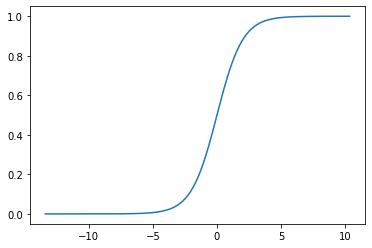

In [8]:
### 시그모이드 함수 예시
import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
z = np.arange(decisions.min(), decisions.max(), 0.1)


### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환
#            : z값의 스케일을 통일 시키기 위해
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

- SGD

In [9]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 과대적합
# 훈련데이터가 더 높은 정확도를 보이지만
# 테스트 결과와 차이가 좀 있음

0.9812206572769953
0.958041958041958


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
import numpy as np

sc = SGDClassifier(loss = 'log', random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300):
    sc.partial_fit(train_scaled,  train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will

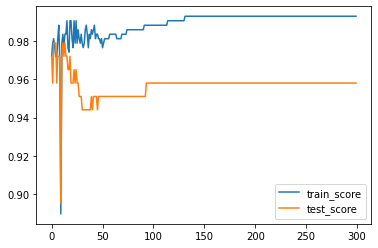

In [11]:
### 최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.legend()
plt.show()

In [12]:
# 다시 훈련
sc = SGDClassifier(loss='log', max_iter=20, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 과대적합
# 이전 결과보다 더 좋아졌음
# 로지스틱회귀분류 : 0.9859154929577465 / 0.9790209790209791
# 두 모델 모두 훈련과 테스트 차이가 비슷함
# 훈련의 계수가 큰 로지스틱회귀분류 모델이 더 적합해보임

0.9812206572769953
0.9790209790209791


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [13]:
import pandas as pd

column_names = breast_cancer_data['feature_names']
df = pd.DataFrame(data, columns = column_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
pre_data = df.to_numpy()
class_pred = ss.transform(pre_data)

In [15]:
result_predict = lr.predict(class_pred)

df['class'] = target
df['class_pred'] = result_predict

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class,class_pred
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0


In [16]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(df[(df["class"] == df["class_pred"])])
o_cnt

x_cnt = len(df[(df["class"] != df["class_pred"])])
x_cnt

sum_cnt = len(df)
sum_cnt 

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))
print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 갯수[569]건 중에, 정답갯수[560]건, 오답 갯수[9]건
총 100.0% 중 정답률[98.42%], 오답률[1.58%]


- 결정트리

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_scaled, train_target)

print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))
print("========================")
print(dtc.predict(test_scaled))

# 과대적합
# 훈련결과 매우 우수 
# 테스트결과도 우수하나 다른 모델에 비해 훈련과 테스트의 결과 차이가 있음

1.0
0.951048951048951
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1]


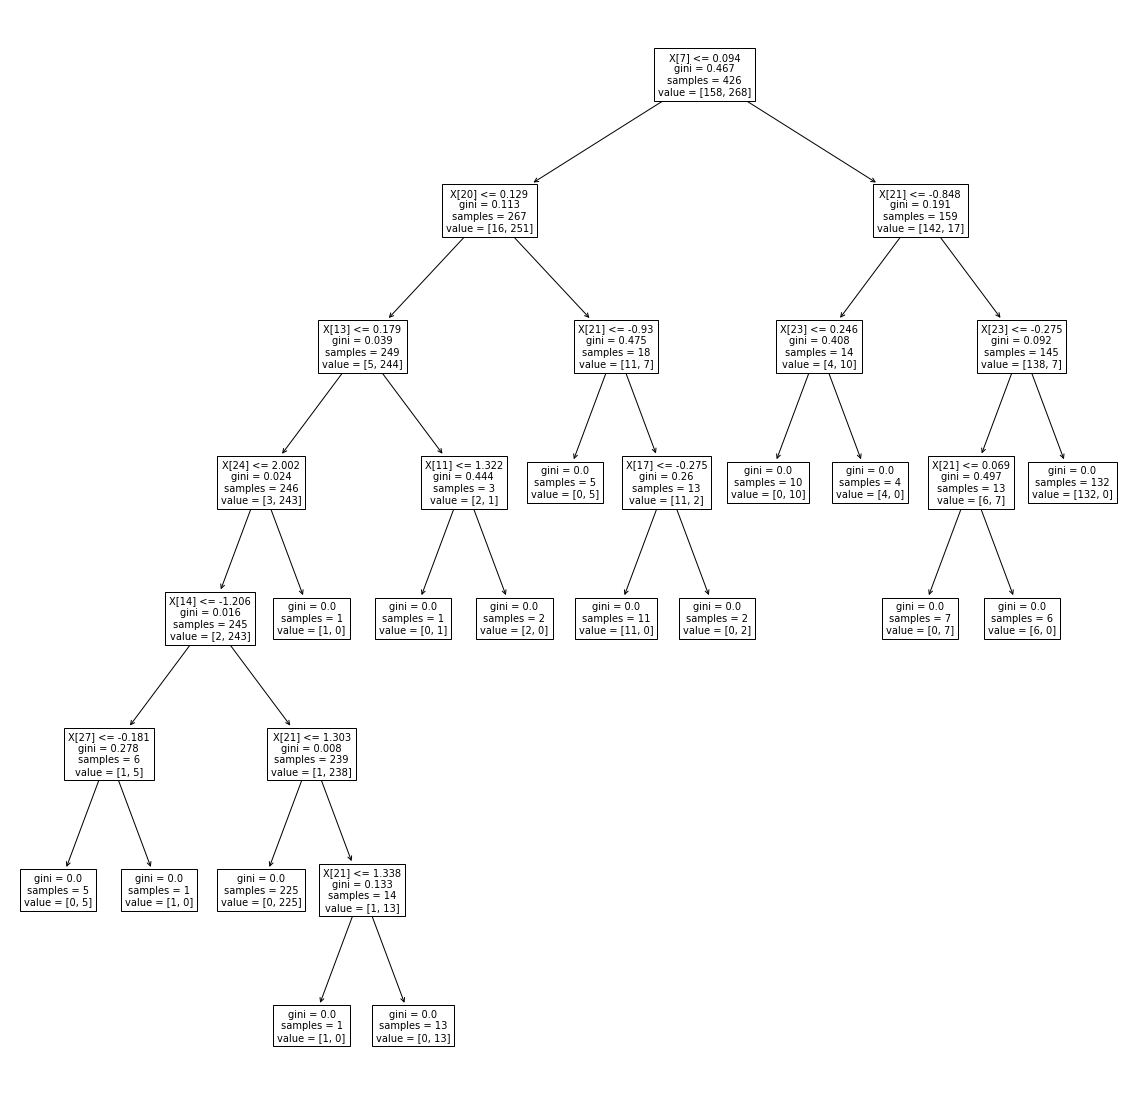

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
plot_tree(dtc)
plt.show()

In [19]:
# 특성중요도
print(breast_cancer_data['feature_names'])
print(dtc.feature_importances_)
a= breast_cancer_data['feature_names']
a[8],a[9],a[14],a[15],a[18],a[21],a[22],a[23],a[24],a[25]

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.         0.         0.         0.         0.         0.
 0.         0.69593688 0.         0.         0.         0.00670697
 0.         0.01277192 0.00155458 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.         0.06326461
 0.00985664 0.         0.         0.00838371 0.         0.        ]


('mean symmetry',
 'mean fractal dimension',
 'smoothness error',
 'compactness error',
 'symmetry error',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness')

In [21]:
df_target = df['class'].to_numpy()

In [22]:
def effect(a, b):
    c = df[[a,b]].to_numpy()

    train_input, test_input, train_target, test_target = train_test_split(c, df_target, random_state=30)

    ss = StandardScaler()
    ss.fit(train_input)
    train_scaled = ss.transform(train_input)
    test_scaled = ss.transform(test_input)

    dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
    dtc.fit(train_scaled, train_target)
    print(dtc.score(train_scaled, train_target))
    print(dtc.score(test_scaled, test_target))

In [23]:
# 'mean symmetry','mean fractal dimension'
effect('mean symmetry','mean fractal dimension')

0.6901408450704225
0.6853146853146853


In [24]:
# mean symmetry + smoothness error
effect('mean symmetry','smoothness error')

0.6854460093896714
0.6083916083916084


- 교차검증

In [25]:
from sklearn.model_selection import cross_validate

dtc = DecisionTreeClassifier(random_state=42)
scores = cross_validate(dtc, train_scaled, train_target)
print(scores)

print("최종 score = ", np.mean(scores['test_score']))

{'fit_time': array([0.01296735, 0.00831318, 0.00717664, 0.00797629, 0.0099721 ]), 'score_time': array([0.00099659, 0.00066185, 0.00099707, 0.        , 0.        ]), 'test_score': array([0.95348837, 0.91764706, 0.92941176, 0.95294118, 0.88235294])}
최종 score =  0.9271682626538986


In [26]:
from sklearn.model_selection import GridSearchCV

# 찾을 하이퍼파라미터는 딕셔너리로
# 실제 파라미터 변수이름 그대로, 찾을 범위 지정
params = {'max_depth' : range(5, 20, 1)}

# 객체(모델) 생성
# - 첫번째 값 : 훈련모델 넣기
# - 두번째 값 : 찾을 하이퍼파라미터 값들(딕셔너리로 정의)
# - 세번째 값 : CPU 코어 갯수(-1은 모든 코어 사용, 벙렬 처리)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 params, n_jobs = -1)

# 훈련시키기
gs.fit(train_scaled, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20)})

In [27]:
print(gs.best_estimator_)
dt = gs.best_estimator_
print(dt.score(train_scaled, train_target))

DecisionTreeClassifier(max_depth=7, random_state=42)
1.0


In [28]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5, 20, 1),
          'min_samples_split' : range(2, 100, 10)}

# ### 그리드서치 훈련시키기
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                 params, n_jobs = -1)

gs.fit(train_scaled, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [29]:
print(gs.best_estimator_)
dt = gs.best_estimator_
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.0001,
                       random_state=42)
1.0
0.951048951048951


- 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# 랜덤포레스트 객체생성 : 코어 모두 사용
rf = RandomForestClassifier(n_jobs = -1, random_state=42)

# 교차검증 진행
# - return_train_score : 검증결과 반환받기
scores = cross_validate(rf, train_scaled, train_target, return_train_score=True, n_jobs = -1)

# 최종 훈련평가 결과 및 검증결과
print(scores)
print('=============')
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
rf.fit(train_scaled, train_target)

- 엑스트라 트리

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, train_scaled, train_target, return_train_score=True)

print(scores)
print('----------------')
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

- 그레디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators = 500,
                                learning_rate = 0.2,
                                random_state=42)
scores = cross_validate(gb, train_scaled, train_target,
                        return_train_score=True)

print(scores)
print('----------------')
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

- 히스토그램기반 그레디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_scaled, train_target,
                        return_train_score=True)

print(scores)
print('----------------')
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
###
# k-최근접 이웃 : 0.958041958041958 / 0.9835680751173709
# 로지스틱회귀분류 : 0.9859154929577465 / 0.9790209790209791
# sgd(확률적경사하강법) : 0.9812206572769953 / 0.958041958041958 
# sgd 최적 에포크 : 0.9812206572769953 / 0.9790209790209791
# 결정트리 ;1.0 / 0.958041958041958
# 그리드서치 : 1.0 / 0.951048951048951
# 랜덤포레스트 : 1.0 / 0.9577291381668946
# 엑스트라 트리 :1.0 / 0.9623803009575924
# 그레디언트 부스팅 :1.0 / 0.9506429548563611
# 히스토그램기반 그레디언트 부스팅 : 1.0 / 0.9600820793433653

### 훈련/테스트 모두 0.9이상으로 높은 결과
# k-최근접 이웃은 과소적합 나머지는 모두 과대적합
# 훈련과 테스트 결과에 차이가 적은 최적 에포트를 찾은 확률적경사하강법이 적합해 보임